# Predicting house prices

## imports

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
import scipy.stats as stats
from scipy.stats import norm

#changing view columns
pd.set_option('display.max_columns',300)
pd.set_option('display.max_rows',300)

/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
#importing data
df = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [3]:
#looking at the size of the data set 
df.shape 

(1460, 81)

In [4]:
df_test.shape

(1459, 80)

In [5]:
#looking at the first 5 rows of the data 
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#looking at the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## Exploring the data

In [7]:
#looking at the size of the data
df.shape

(1460, 81)

In [8]:
#exploring the target variable
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


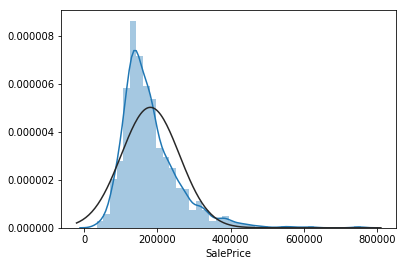

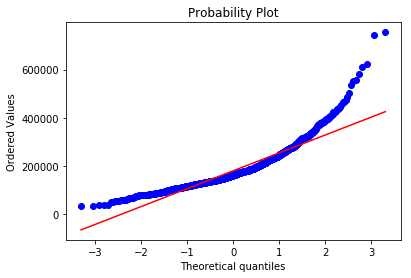

In [9]:
#looking at the saleprice distribution with a normal fit
#looking at how close the saleprice is to a normal distribution

sns.distplot(df['SalePrice'],bins=40,fit=norm)
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

In [10]:
#looking at the skew of the graph and the kurtosis or sharpness of the peak
print('Saleprice skew: ',df.SalePrice.skew())
print('Kurtosis: ',df.SalePrice.kurtosis())

Saleprice skew:  1.8828757597682129
Kurtosis:  6.536281860064529


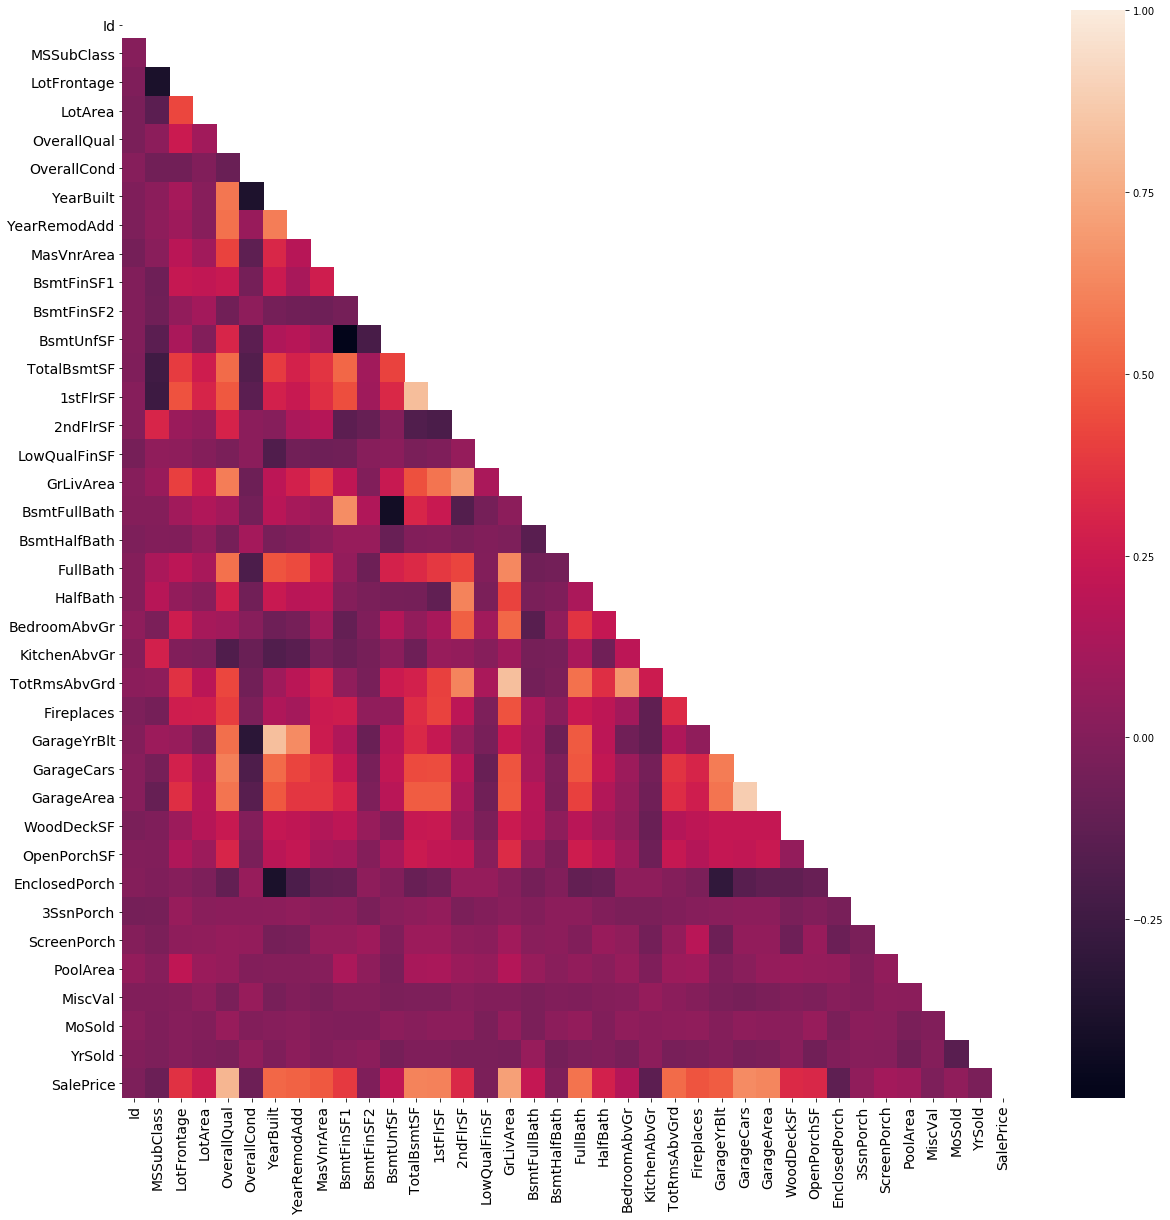

In [11]:
df_corr = df.corr()
### Set the default matplotlib figure size to 7x7:
fig, ax = plt.subplots(figsize = (20, 20))
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Plot the heatmap with seaborn.
ax = sns.heatmap(df_corr, mask = mask, ax = ax)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize = 14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize = 14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

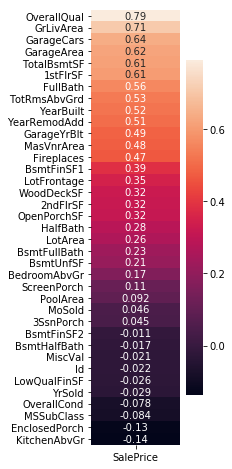

In [12]:
#heatmap of values corralating to saleprice
sale_corr = pd.DataFrame(df.corr()['SalePrice'][:-1]
                        ).sort_values(by = 'SalePrice',ascending = False)

plt.figure(figsize=(2,8))
sns.heatmap(sale_corr,annot=True)

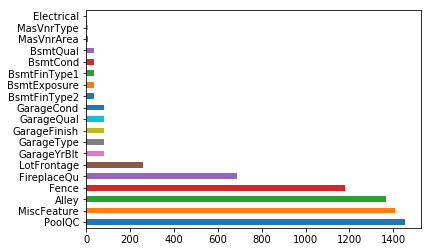

In [13]:
#looking at all the features with missing values
vals_miss = df.isna().sum()
vals_miss = vals_miss[vals_miss > 0]
vals_miss.sort_values(ascending=False,inplace=True)

vals_miss.plot(kind='barh')

<Figure size 504x720 with 0 Axes>

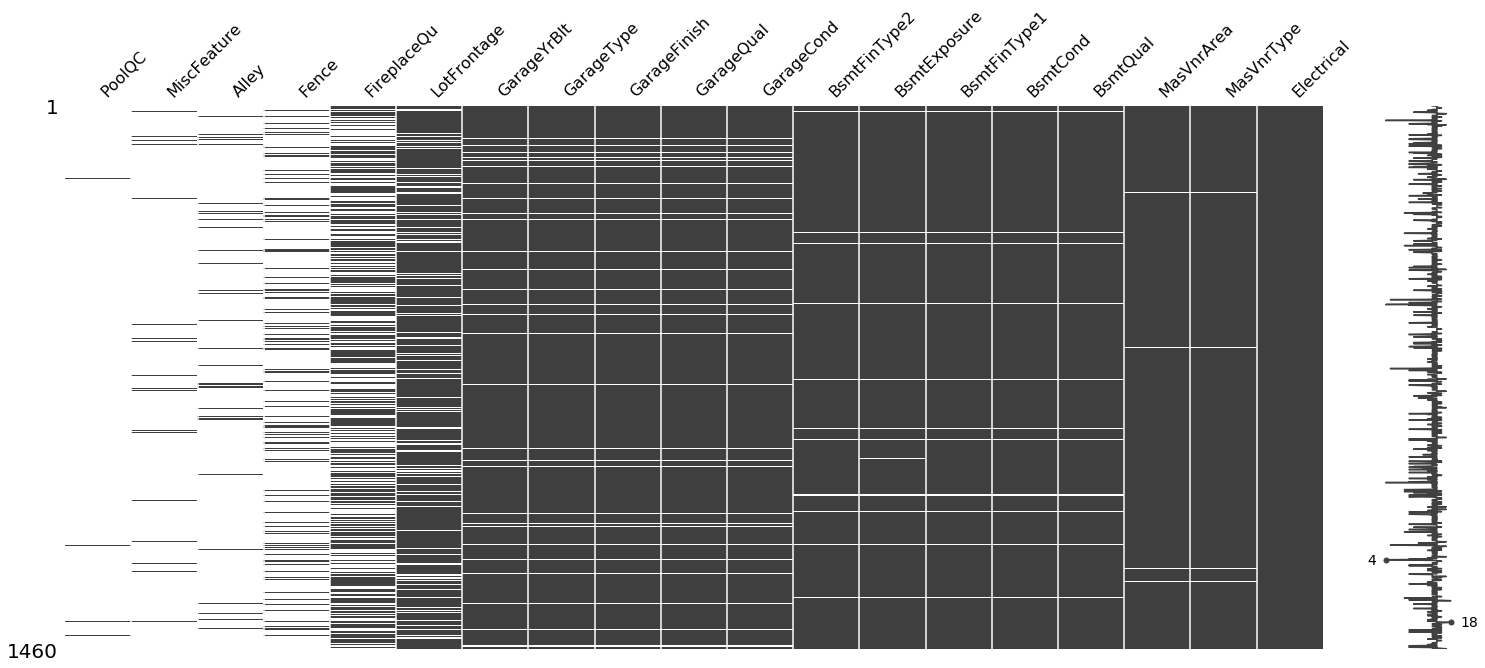

In [14]:
#looking at the missing data and where its located 
plt.figure(figsize=(7,10))
msno.matrix(df[vals_miss.index])

In [15]:
#looking deeper at the unique values of the null columns
for i in vals_miss.index:
    print(i,df[i].unique(),vals_miss[i],'\n')

PoolQC [nan 'Ex' 'Fa' 'Gd'] 1453 

MiscFeature [nan 'Shed' 'Gar2' 'Othr' 'TenC'] 1406 

Alley [nan 'Grvl' 'Pave'] 1369 

Fence [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw'] 1179 

FireplaceQu [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po'] 690 

LotFrontage [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.] 259 

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953

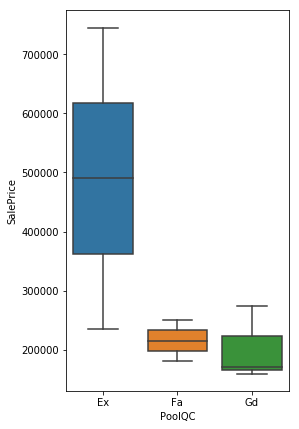

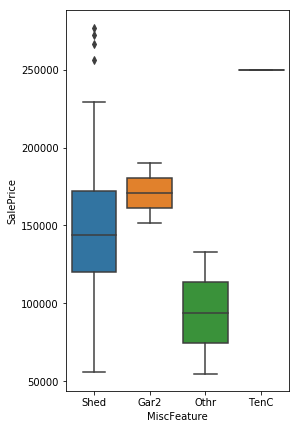

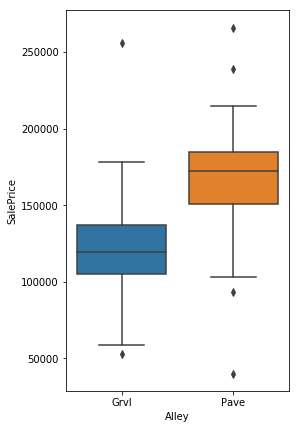

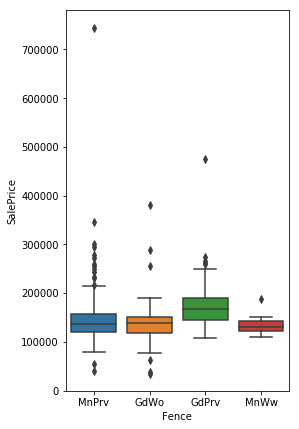

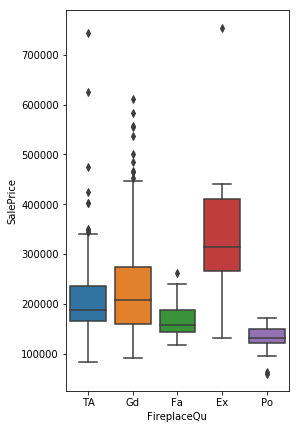

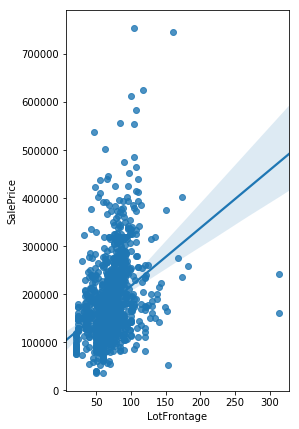

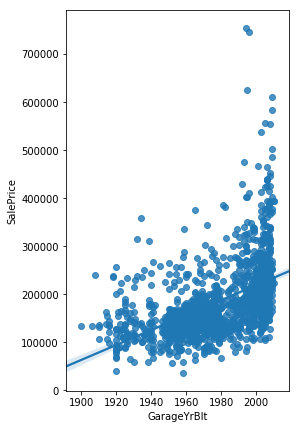

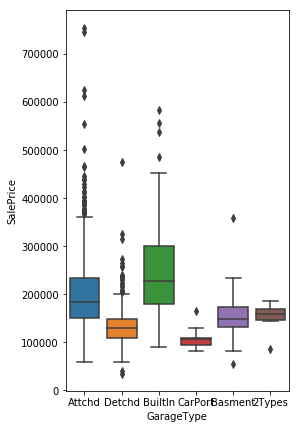

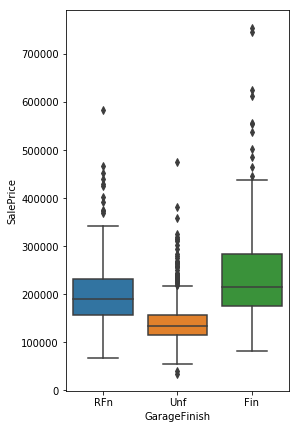

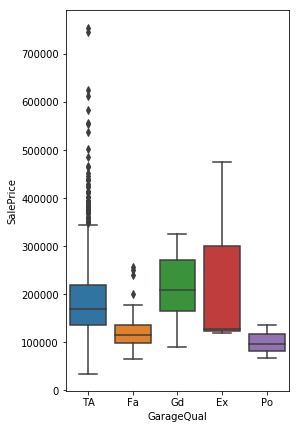

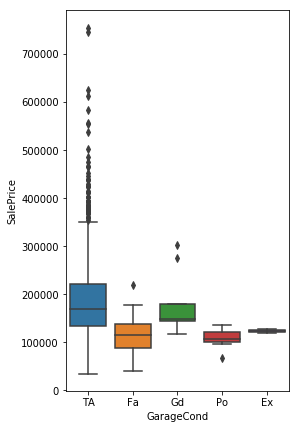

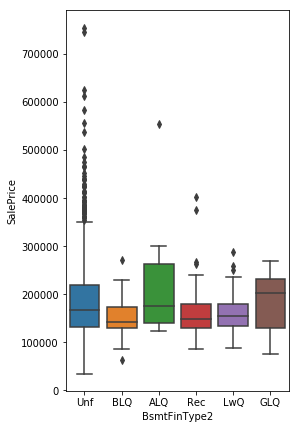

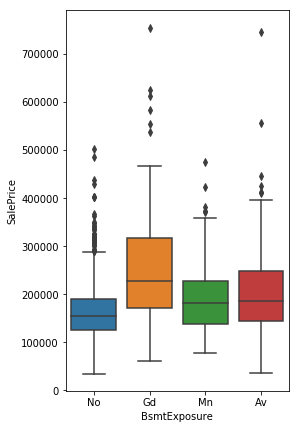

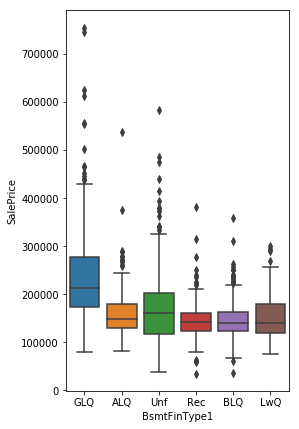

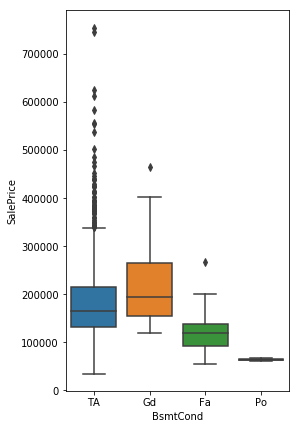

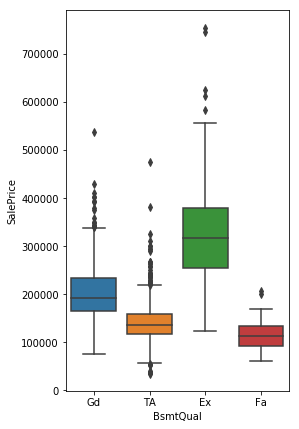

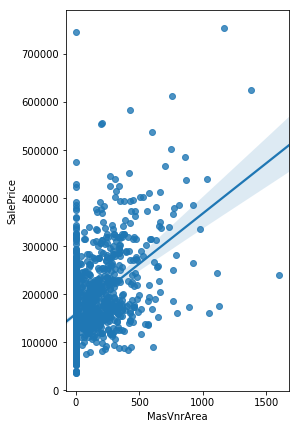

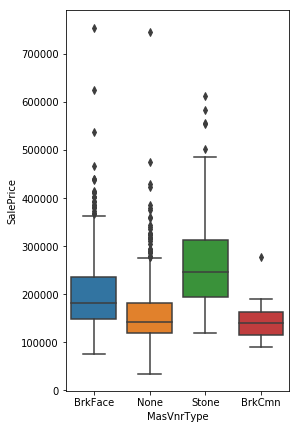

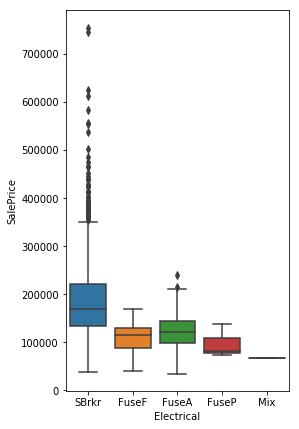

In [16]:
#creating graphs of the columns with nulls to figure out if they are worth keeping
for i in vals_miss.index:
    plt.figure(figsize=(4,7))
    try: 
        sns.regplot(x=df[i] ,y = df['SalePrice']) 
    except:
        ax = sns.boxplot(x = df[i], y = df['SalePrice'],)

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


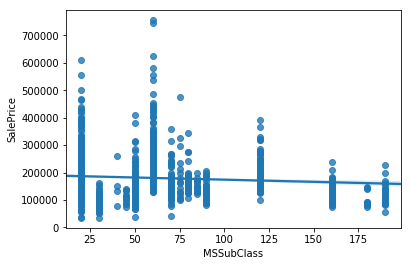

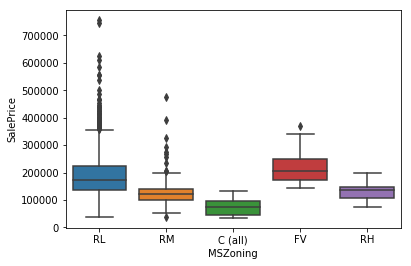

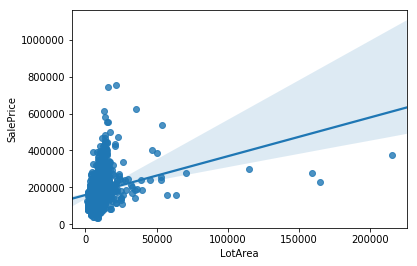

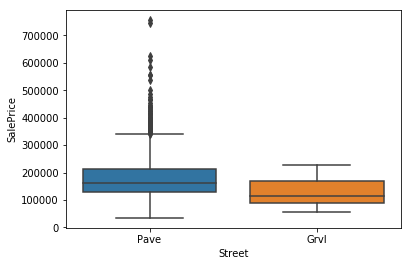

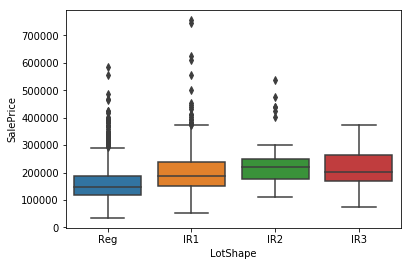

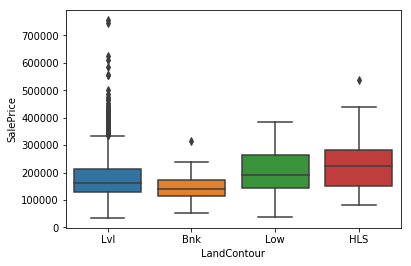

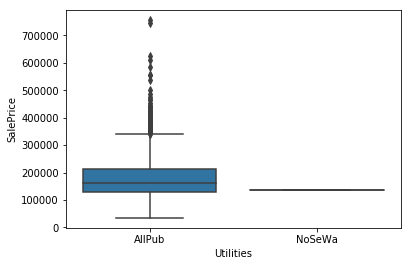

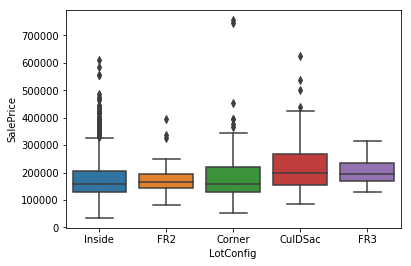

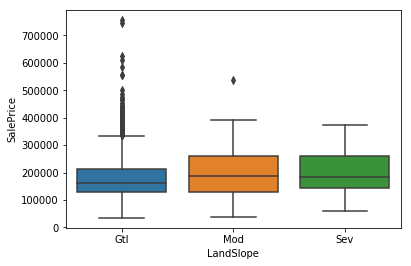

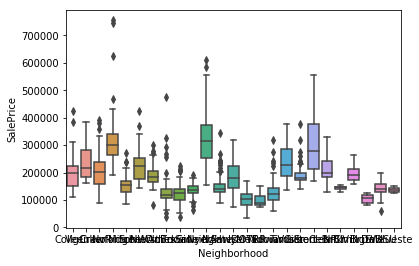

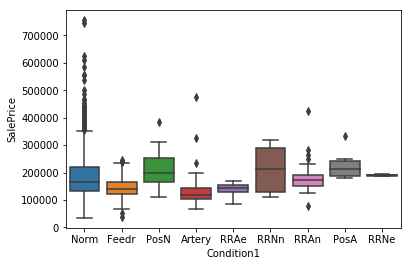

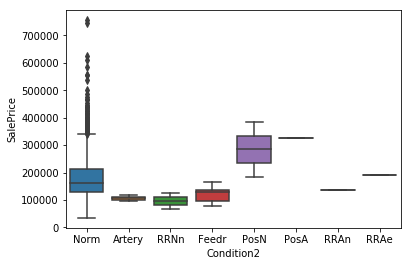

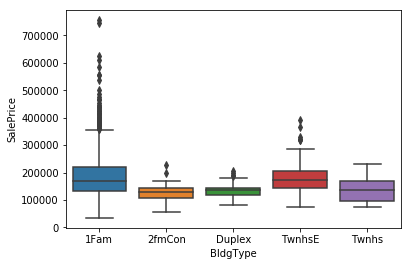

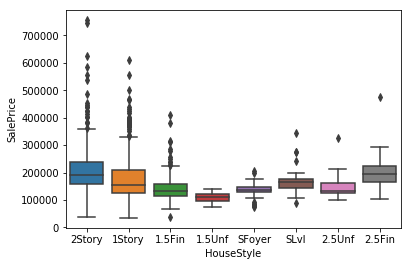

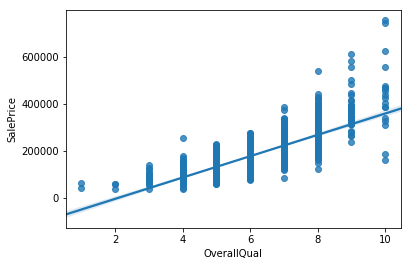

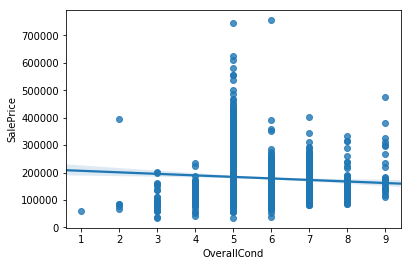

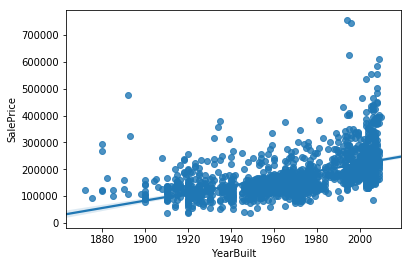

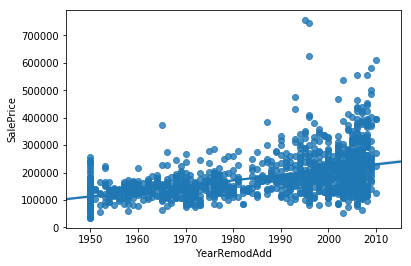

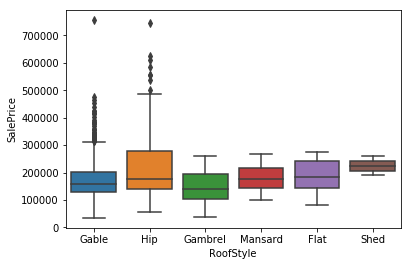

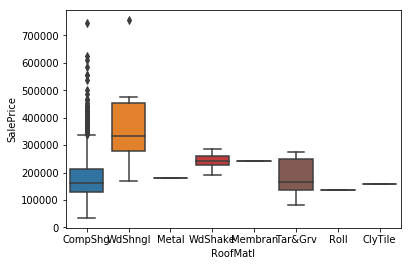

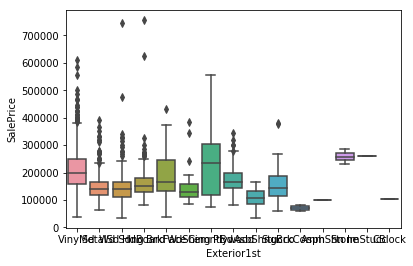

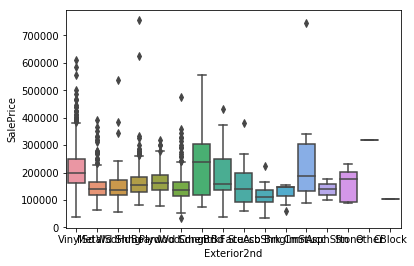

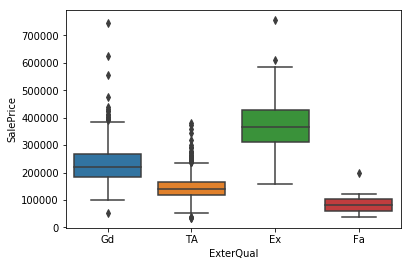

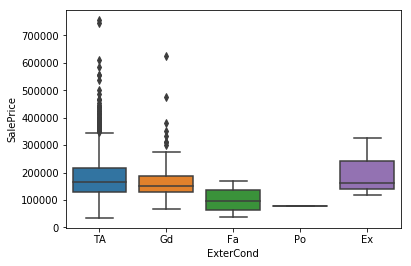

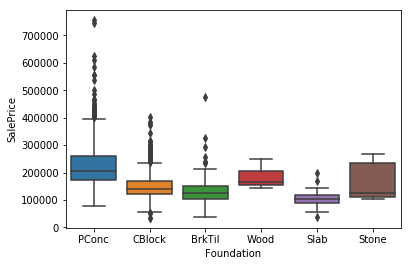

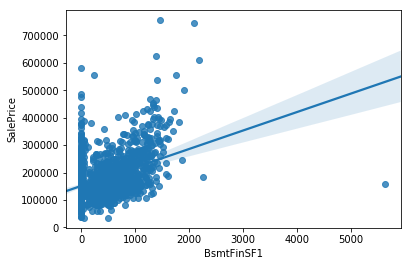

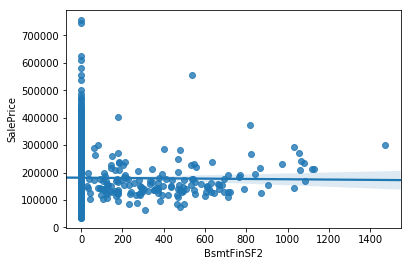

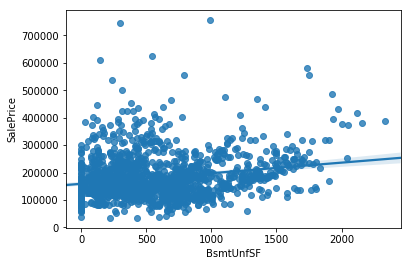

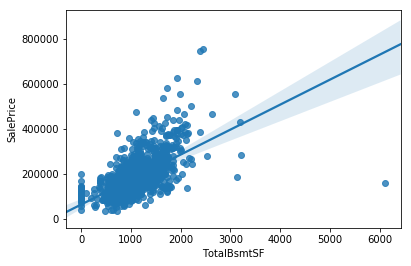

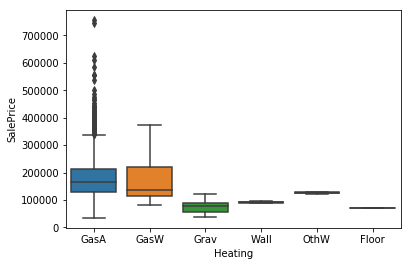

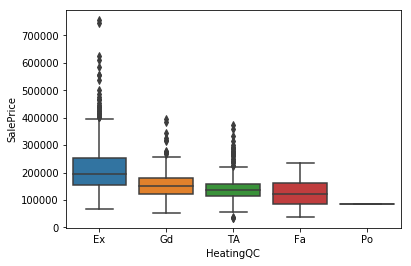

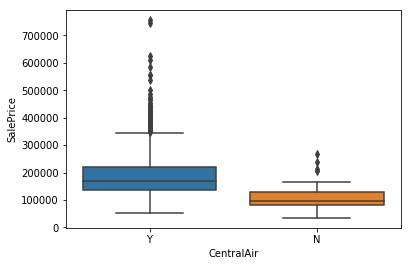

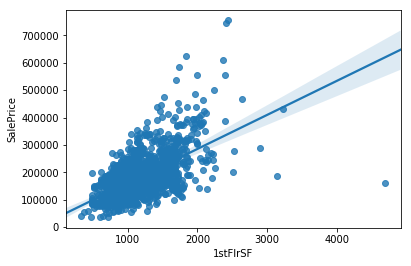

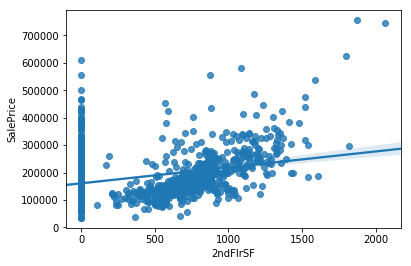

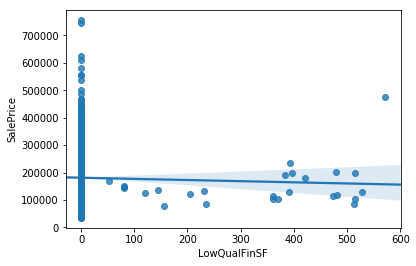

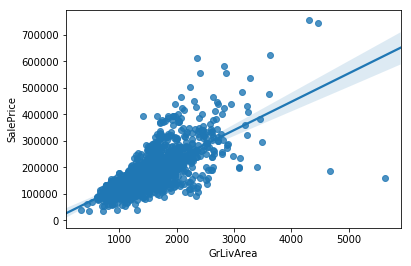

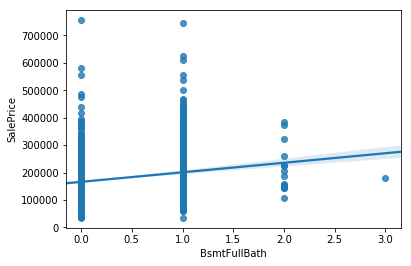

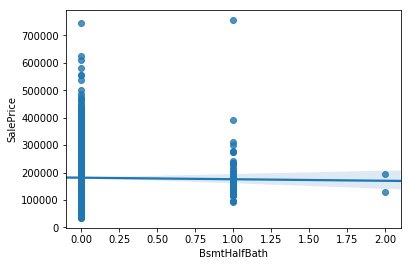

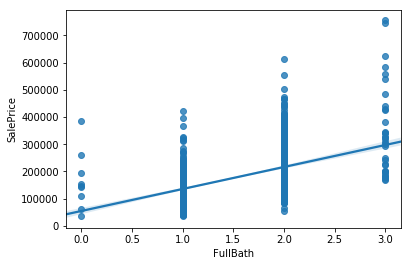

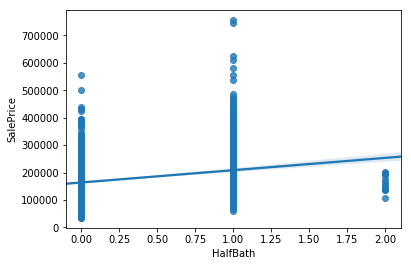

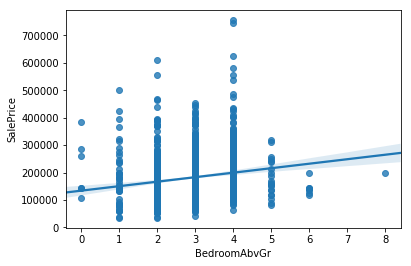

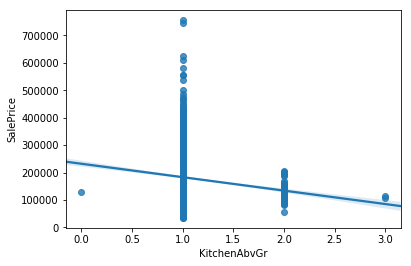

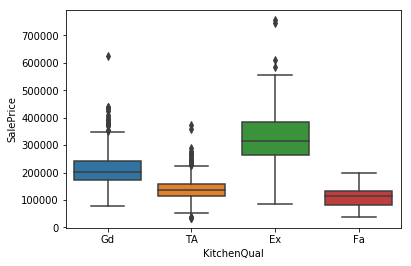

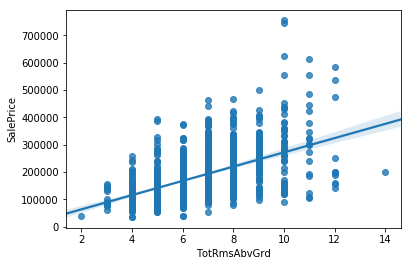

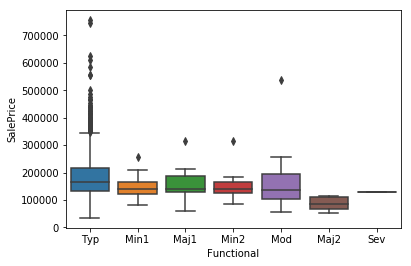

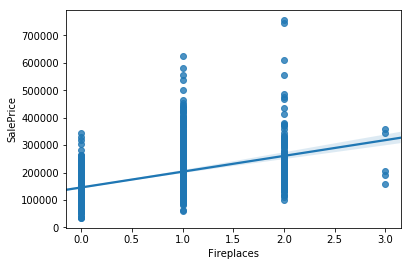

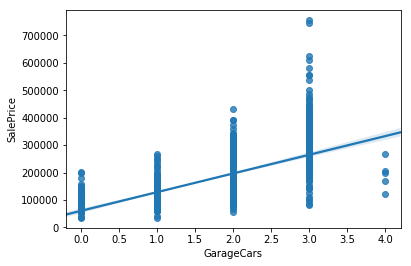

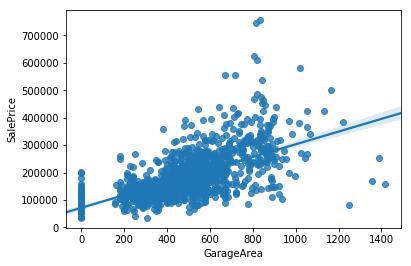

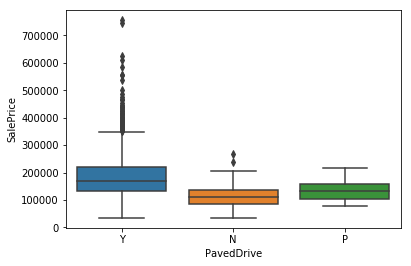

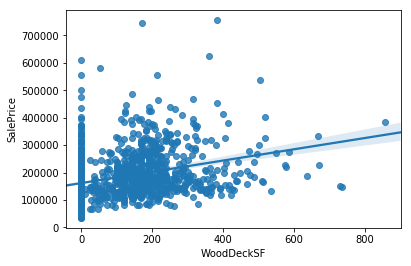

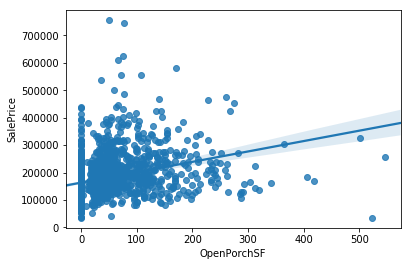

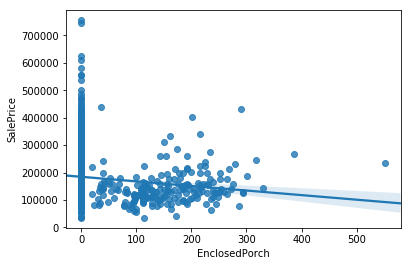

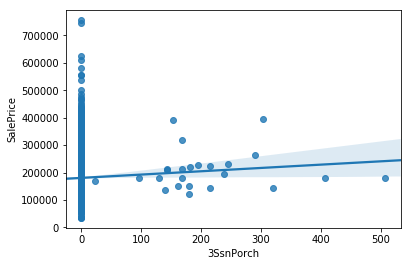

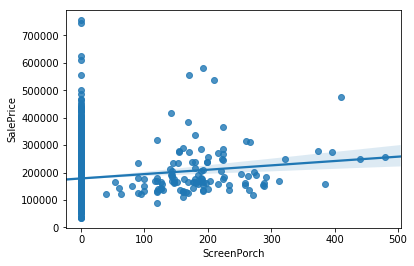

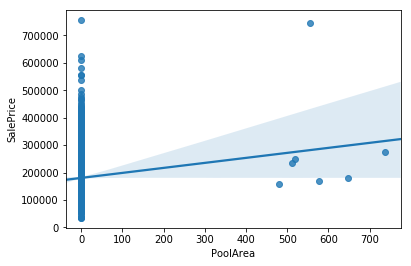

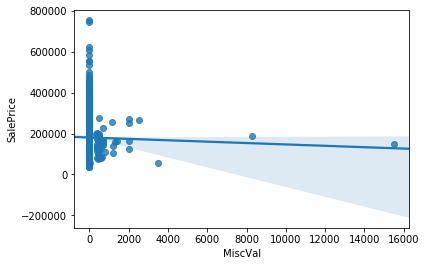

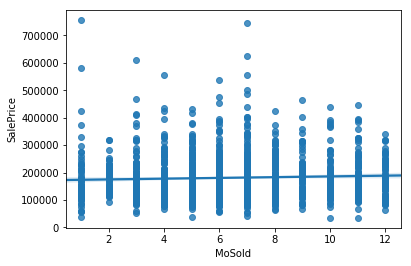

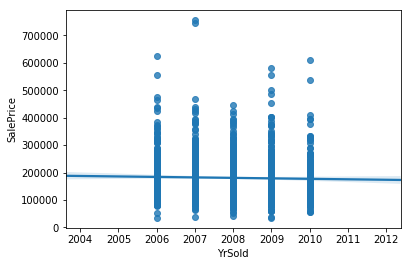

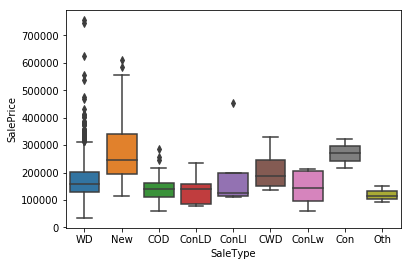

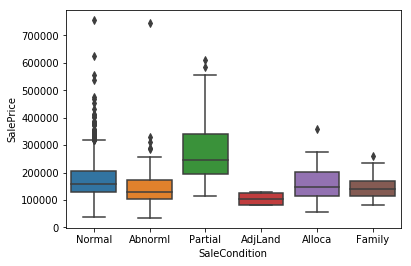

In [17]:
##creating quick graphs of all columns 
for i in df.columns[1:-1].drop(vals_miss.index):
    try:
        plt.figure()
        sns.regplot(df[i],df['SalePrice'])
    except:
        sns.boxplot(df[i],df['SalePrice'])
    

In [18]:
#looking at some correlated 

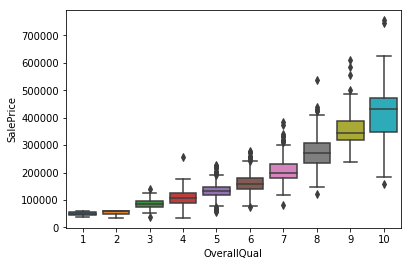

In [19]:
#Overallqual plot
sns.boxplot(df['OverallQual'],df['SalePrice'])

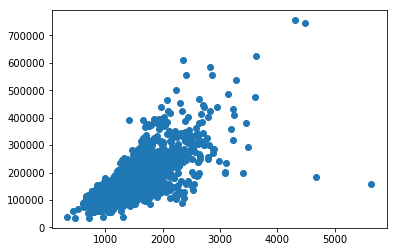

In [20]:
#looking at grlive
plt.scatter(df['GrLivArea'],df['SalePrice'],)

In [21]:
#removing out liars
#df[df >4500]['GrLiveArea']

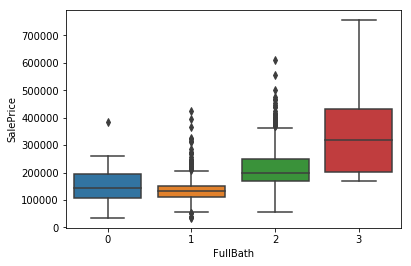

In [22]:
sns.boxplot(df['FullBath'],df['SalePrice'])

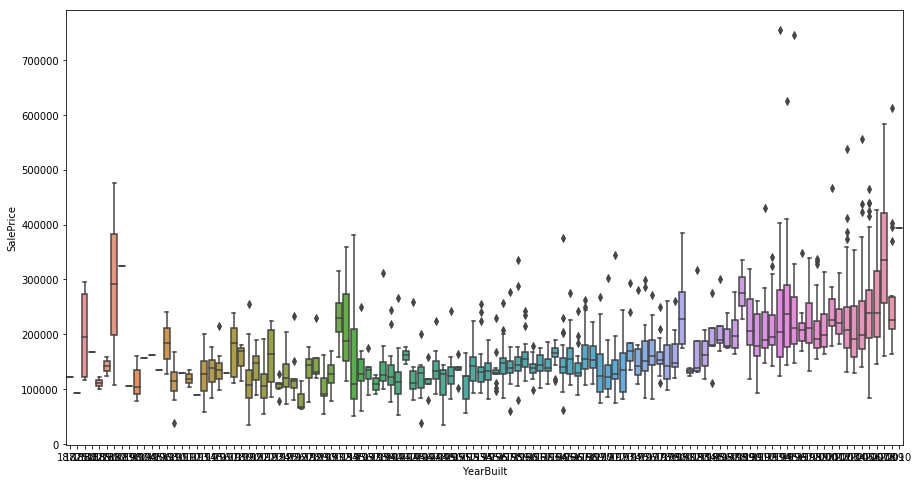

In [23]:
plt.figure(figsize=(15,8))
sns.boxplot(df['YearBuilt'],df['SalePrice'])

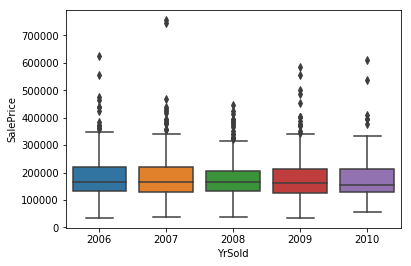

In [24]:
sns.boxplot(df['YrSold'],df['SalePrice'])

In [25]:
#creating a list of saleprice correlations
#then prints the first and last seven 
sale_corr = df.corr()
sale_corr = sale_corr.sort_values(by = 'SalePrice')[:-1]['SalePrice']
print('most correlated','\n',sale_corr[-7:])
print()
print('least correlated','\n',sale_corr[:7])

most correlated 
 FullBath       0.560664
1stFlrSF       0.605852
TotalBsmtSF    0.613581
GarageArea     0.623431
GarageCars     0.640409
GrLivArea      0.708624
OverallQual    0.790982
Name: SalePrice, dtype: float64

least correlated 
 KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
Name: SalePrice, dtype: float64


In [26]:
col = [
    'OverallQual',
    'GrLivArea',
    'TotalBsmtSF',
    'FullBath',
    'EnclosedPorch',
    'YearBuilt',   
]
X = df[col]
y = df['SalePrice']

In [27]:
df[col].isna().sum()

OverallQual      0
GrLivArea        0
TotalBsmtSF      0
FullBath         0
EnclosedPorch    0
YearBuilt        0
dtype: int64

## creating the models

### Linear Regression

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import bayes
from sklearn.metrics import mean_squared_error,r2_score

In [83]:
#train test split 
x_train,x_test,y_train,y_test = train_test_split(X,y)

In [84]:
#creating linear regression model and fitting to training data
lr_model = LinearRegression(normalize=False)

lr_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### evaluating the model

In [85]:
#looking at the differnce between the score on the training and 
# the mean squared error of the test
print('model score training: ',lr_model.score(x_train,y_train))

lr_pred = lr_model.predict(x_test)
print('mse: ',mean_squared_error(lr_pred,y_test))
print('r2: ',r2_score(y_test,lr_pred))

model score training:  0.7462225482102207
mse:  1167147676.2996094
r2:  0.7968046825159428


### RandomForest

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [33]:
rf_params = {
    
    'criterion':['mse','mae'],
    'n_estimators': [2,5,7,20,25,31],
    'min_samples_split': [3,7,10,15,20],
    'max_features':[2,4,5,6],
    'max_depth':[20,100,300,500]
}

rf_gs = GridSearchCV(RandomForestRegressor(), rf_params, cv=5, verbose=1, n_jobs=2)
rf_gs = rf_gs.fit(X,y)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


[Parallel(n_jobs=2)]: Done 676 tasks      | elapsed:   11.0s
[Parallel(n_jobs=2)]: Done 2596 tasks      | elapsed:   56.0s
[Parallel(n_jobs=2)]: Done 3096 tasks      | elapsed:  2.0min
[Parallel(n_jobs=2)]: Done 3796 tasks      | elapsed:  3.4min
[Parallel(n_jobs=2)]: Done 4696 tasks      | elapsed:  5.3min
[Parallel(n_jobs=2)]: Done 4800 out of 4800 | elapsed:  5.6min finished


In [1]:
print('Best params',rf_gs.best_params_)
print('Best score: ',rf_gs.best_score_)

NameError: name 'rf_gs' is not defined

In [2]:
#creating rf with est params 
rf = RandomForestRegressor(criterion='mae',max_depth=500,max_features= 4, min_samples_split= 7, n_estimators=20)
rf.fit(x_train,y_train)

rf_pred = rf.predict(x_test)
print('model score training: ',rf.score(x_train,y_train))
print('mse: ',mean_squared_error(rf_pred,y_test))
print('r2: ',r2_score(y_test,rf_pred))

NameError: name 'RandomForestRegressor' is not defined

###  Neural network 

In [227]:
from keras.models import Sequential
from keras.layers import Dense

In [287]:
#creating model
nn_model = Sequential()
nn_model.add(Dense(6,activation='relu',input_dim = x_train.shape[1]))
nn_model.add(Dense(10,activation='relu'))
nn_model.add(Dense(10,activation='relu'))
#for all regression problems your output layer is 1 nueron with no activation function
nn_model.add(Dense(1,activation=None))

In [288]:
#compiling model
nn_model.compile(loss='mean_squared_error',optimizer='adam')

In [289]:
#using more epochs because not enough data
history = nn_model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=2800,batch_size=20)

Train on 1095 samples, validate on 365 samples
Epoch 1/2800
1095/1095 [==============================] - 2s 1ms/step - loss: 39029745879.0868 - val_loss: 39110760868.8219
Epoch 2/2800
1095/1095 [==============================] - 0s 117us/step - loss: 38818857221.8447 - val_loss: 38868863845.6986
Epoch 3/2800
1095/1095 [==============================] - 0s 122us/step - loss: 38400758704.5114 - val_loss: 38163221798.5753
Epoch 4/2800
1095/1095 [==============================] - 0s 117us/step - loss: 37264151865.2785 - val_loss: 36435696261.2603
Epoch 5/2800
1095/1095 [==============================] - 0s 117us/step - loss: 34769245104.5114 - val_loss: 33045959217.0959
Epoch 6/2800
1095/1095 [==============================] - 0s 121us/step - loss: 30377327134.3927 - val_loss: 27457465919.1233
Epoch 7/2800
1095/1095 [==============================] - 0s 121us/step - loss: 23912967612.2009 - val_loss: 20092201773.5890
Epoch 8/2800
1095/1095 [==============================] - 0s 123us/step -

1095/1095 [==============================] - 0s 138us/step - loss: 2493357682.5571 - val_loss: 1905679598.4658
Epoch 132/2800
1095/1095 [==============================] - 0s 123us/step - loss: 2500332095.1233 - val_loss: 1900139874.1918
Epoch 133/2800
1095/1095 [==============================] - 0s 124us/step - loss: 2491672807.1598 - val_loss: 1912408411.1781
Epoch 134/2800
1095/1095 [==============================] - 0s 125us/step - loss: 2487542933.6256 - val_loss: 1917649439.5616
Epoch 135/2800
1095/1095 [==============================] - 0s 135us/step - loss: 2489057249.8995 - val_loss: 1898133786.3014
Epoch 136/2800
1095/1095 [==============================] - 0s 137us/step - loss: 2488323957.4795 - val_loss: 1911999153.0959
Epoch 137/2800
1095/1095 [==============================] - ETA: 0s - loss: 2558492826.18 - 0s 142us/step - loss: 2488218874.1553 - val_loss: 1902118792.7671
Epoch 138/2800
1095/1095 [==============================] - 0s 132us/step - loss: 2486597882.7397 - v

Epoch 196/2800
1095/1095 [==============================] - 0s 132us/step - loss: 2394751997.6621 - val_loss: 1921691758.4658
Epoch 197/2800
1095/1095 [==============================] - 0s 140us/step - loss: 2391575520.4384 - val_loss: 1919262434.1918
Epoch 198/2800
1095/1095 [==============================] - 0s 143us/step - loss: 2386411158.2100 - val_loss: 1915634519.6712
Epoch 199/2800
1095/1095 [==============================] - 0s 137us/step - loss: 2397150737.8265 - val_loss: 1909934539.3973
Epoch 200/2800
1095/1095 [==============================] - 0s 129us/step - loss: 2382983909.6986 - val_loss: 1919470046.6849
Epoch 201/2800
1095/1095 [==============================] - 0s 117us/step - loss: 2391422530.0457 - val_loss: 1929595311.3425
Epoch 202/2800
1095/1095 [==============================] - 0s 118us/step - loss: 2383596174.0274 - val_loss: 1923633453.5890
Epoch 203/2800
1095/1095 [==============================] - 0s 123us/step - loss: 2379141138.7032 - val_loss: 19085410

1095/1095 [==============================] - 0s 148us/step - loss: 2274983332.8219 - val_loss: 1937489330.8493
Epoch 262/2800
1095/1095 [==============================] - 0s 121us/step - loss: 2273710158.9041 - val_loss: 1935079715.0685
Epoch 263/2800
1095/1095 [==============================] - 0s 121us/step - loss: 2263710529.4612 - val_loss: 1930585761.3151
Epoch 264/2800
1095/1095 [==============================] - 0s 121us/step - loss: 2275487411.4338 - val_loss: 1944975957.9178
Epoch 265/2800
1095/1095 [==============================] - 0s 141us/step - loss: 2263827389.0776 - val_loss: 1934318606.0274
Epoch 266/2800
1095/1095 [==============================] - 0s 147us/step - loss: 2257768571.3242 - val_loss: 1939568959.1233
Epoch 267/2800
1095/1095 [==============================] - 0s 144us/step - loss: 2264267094.5023 - val_loss: 1943082883.5068
Epoch 268/2800
1095/1095 [==============================] - 0s 148us/step - loss: 2255106456.5479 - val_loss: 1933775507.2877
Epoch 2

1095/1095 [==============================] - 0s 127us/step - loss: 2065258180.3836 - val_loss: 1960961849.8630
Epoch 392/2800
1095/1095 [==============================] - 0s 106us/step - loss: 2068979183.0502 - val_loss: 1959251636.6027
Epoch 393/2800
1095/1095 [==============================] - 0s 114us/step - loss: 2064612158.5388 - val_loss: 1981712157.8082
Epoch 394/2800
1095/1095 [==============================] - 0s 110us/step - loss: 2062463611.3242 - val_loss: 1965572904.3288
Epoch 395/2800
1095/1095 [==============================] - 0s 116us/step - loss: 2059443737.7169 - val_loss: 1975683827.7260
Epoch 396/2800
1095/1095 [==============================] - 0s 110us/step - loss: 2054714202.0091 - val_loss: 1960471089.0959
Epoch 397/2800
1095/1095 [==============================] - 0s 114us/step - loss: 2066669418.9589 - val_loss: 1956575850.9589
Epoch 398/2800
1095/1095 [==============================] - 0s 117us/step - loss: 2056501969.8265 - val_loss: 1972194631.8904
Epoch 3

1095/1095 [==============================] - 0s 118us/step - loss: 2005425069.0046 - val_loss: 1949115711.1233
Epoch 522/2800
1095/1095 [==============================] - 0s 119us/step - loss: 2008472170.9589 - val_loss: 1942851675.1781
Epoch 523/2800
1095/1095 [==============================] - 0s 114us/step - loss: 2001258037.7717 - val_loss: 1968293674.0822
Epoch 524/2800
1095/1095 [==============================] - 0s 109us/step - loss: 2009712918.2100 - val_loss: 1964013746.8493
Epoch 525/2800
1095/1095 [==============================] - 0s 109us/step - loss: 2005287255.6712 - val_loss: 1963194788.8219
Epoch 526/2800
1095/1095 [==============================] - 0s 109us/step - loss: 2005376814.1735 - val_loss: 1958793366.7945
Epoch 527/2800
1095/1095 [==============================] - 0s 113us/step - loss: 2005804831.5616 - val_loss: 1955982094.0274
Epoch 528/2800
1095/1095 [==============================] - 0s 107us/step - loss: 2008425070.1735 - val_loss: 1950800427.8356
Epoch 5

1095/1095 [==============================] - 0s 109us/step - loss: 1945674134.7945 - val_loss: 1901158947.0685
Epoch 652/2800
1095/1095 [==============================] - 0s 110us/step - loss: 1951794868.6027 - val_loss: 1899840757.4795
Epoch 653/2800
1095/1095 [==============================] - 0s 116us/step - loss: 1957154522.5936 - val_loss: 1895032221.8082
Epoch 654/2800
1095/1095 [==============================] - 0s 114us/step - loss: 1950419189.4795 - val_loss: 1902413422.4658
Epoch 655/2800
1095/1095 [==============================] - 0s 104us/step - loss: 1948414885.4064 - val_loss: 1922993297.5342
Epoch 656/2800
1095/1095 [==============================] - 0s 109us/step - loss: 1943023634.7032 - val_loss: 1897322343.4521
Epoch 657/2800
1095/1095 [==============================] - 0s 118us/step - loss: 1940426661.4064 - val_loss: 1895966108.0548
Epoch 658/2800
1095/1095 [==============================] - 0s 116us/step - loss: 1944815030.3562 - val_loss: 1893682651.1781
Epoch 6

1095/1095 [==============================] - 0s 115us/step - loss: 1908114354.8493 - val_loss: 1830578340.8219
Epoch 782/2800
1095/1095 [==============================] - 0s 117us/step - loss: 1904722244.6758 - val_loss: 1842687656.3288
Epoch 783/2800
1095/1095 [==============================] - 0s 116us/step - loss: 1902956005.6986 - val_loss: 1839279360.0000
Epoch 784/2800
1095/1095 [==============================] - 0s 108us/step - loss: 1909638509.8813 - val_loss: 1839065354.5205
Epoch 785/2800
1095/1095 [==============================] - 0s 118us/step - loss: 1904266221.2968 - val_loss: 1844123025.5342
Epoch 786/2800
1095/1095 [==============================] - 0s 117us/step - loss: 1908946948.0913 - val_loss: 1839933790.6849
Epoch 787/2800
1095/1095 [==============================] - 0s 117us/step - loss: 1909406128.5114 - val_loss: 1856037844.1644
Epoch 788/2800
1095/1095 [==============================] - 0s 114us/step - loss: 1901757379.2146 - val_loss: 1834796694.7945
Epoch 7

1095/1095 [==============================] - 0s 124us/step - loss: 1878826802.2648 - val_loss: 1823818033.0959
Epoch 912/2800
1095/1095 [==============================] - 0s 117us/step - loss: 1882432535.9635 - val_loss: 1816028175.7808
Epoch 913/2800
1095/1095 [==============================] - 0s 116us/step - loss: 1869535105.8995 - val_loss: 1816120111.3425
Epoch 914/2800
1095/1095 [==============================] - 0s 122us/step - loss: 1874033391.6347 - val_loss: 1813211114.9589
Epoch 915/2800
1095/1095 [==============================] - 0s 111us/step - loss: 1869716121.1324 - val_loss: 1829451260.4932
Epoch 916/2800
1095/1095 [==============================] - 0s 108us/step - loss: 1868770268.2009 - val_loss: 1813852935.0137
Epoch 917/2800
1095/1095 [==============================] - 0s 117us/step - loss: 1885030946.4840 - val_loss: 1807751999.1233
Epoch 918/2800
1095/1095 [==============================] - 0s 117us/step - loss: 1876026313.6438 - val_loss: 1807661692.4932
Epoch 9

Epoch 1041/2800
1095/1095 [==============================] - 0s 121us/step - loss: 1839096601.1324 - val_loss: 1806046712.9863
Epoch 1042/2800
1095/1095 [==============================] - 0s 107us/step - loss: 1842180051.5799 - val_loss: 1788964010.0822
Epoch 1043/2800
1095/1095 [==============================] - 0s 108us/step - loss: 1845425277.6621 - val_loss: 1792613197.1507
Epoch 1044/2800
1095/1095 [==============================] - 0s 117us/step - loss: 1842603274.5205 - val_loss: 1793302971.6164
Epoch 1045/2800
1095/1095 [==============================] - 0s 114us/step - loss: 1842255197.2237 - val_loss: 1809933432.9863
Epoch 1046/2800
1095/1095 [==============================] - 0s 107us/step - loss: 1854480631.5251 - val_loss: 1837067062.3562
Epoch 1047/2800
1095/1095 [==============================] - 0s 112us/step - loss: 1856118016.8767 - val_loss: 1801963299.0685
Epoch 1048/2800
1095/1095 [==============================] - 0s 114us/step - loss: 1842554057.6438 - val_loss: 

1095/1095 [==============================] - 0s 109us/step - loss: 1826669450.6667 - val_loss: 1794018584.5479
Epoch 1170/2800
1095/1095 [==============================] - 0s 114us/step - loss: 1831755686.5753 - val_loss: 1784785458.8493
Epoch 1171/2800
1095/1095 [==============================] - 0s 109us/step - loss: 1826520407.8174 - val_loss: 1782411248.2192
Epoch 1172/2800
1095/1095 [==============================] - 0s 118us/step - loss: 1823767472.5114 - val_loss: 1779359514.3014
Epoch 1173/2800
1095/1095 [==============================] - 0s 119us/step - loss: 1827310264.4018 - val_loss: 1784994237.3699
Epoch 1174/2800
1095/1095 [==============================] - 0s 118us/step - loss: 1832750949.6986 - val_loss: 1781648534.7945
Epoch 1175/2800
1095/1095 [==============================] - 0s 118us/step - loss: 1827350028.2740 - val_loss: 1786932125.8082
Epoch 1176/2800
1095/1095 [==============================] - 0s 114us/step - loss: 1826753607.8904 - val_loss: 1796728597.0411


1095/1095 [==============================] - 0s 119us/step - loss: 1812431266.7763 - val_loss: 1769870165.9178
Epoch 1298/2800
1095/1095 [==============================] - 0s 117us/step - loss: 1813964261.6986 - val_loss: 1777042354.8493
Epoch 1299/2800
1095/1095 [==============================] - 0s 112us/step - loss: 1807676661.1872 - val_loss: 1774287247.7808
Epoch 1300/2800
1095/1095 [==============================] - 0s 115us/step - loss: 1816561371.4703 - val_loss: 1770412112.6575
Epoch 1301/2800
1095/1095 [==============================] - 0s 117us/step - loss: 1813200246.6484 - val_loss: 1790579256.1096
Epoch 1302/2800
1095/1095 [==============================] - 0s 115us/step - loss: 1818523131.3242 - val_loss: 1774290880.8767
Epoch 1303/2800
1095/1095 [==============================] - 0s 109us/step - loss: 1810293779.2877 - val_loss: 1787344099.9452
Epoch 1304/2800
1095/1095 [==============================] - 0s 120us/step - loss: 1814626723.3607 - val_loss: 1773333402.3014


1095/1095 [==============================] - 0s 125us/step - loss: 1796569279.1233 - val_loss: 1765010565.2603
Epoch 1426/2800
1095/1095 [==============================] - 0s 118us/step - loss: 1804165293.5890 - val_loss: 1758403114.0822
Epoch 1427/2800
1095/1095 [==============================] - 0s 118us/step - loss: 1797405423.9269 - val_loss: 1778848920.5479
Epoch 1428/2800
1095/1095 [==============================] - 0s 110us/step - loss: 1804276356.0913 - val_loss: 1756169026.6301
Epoch 1429/2800
1095/1095 [==============================] - 0s 117us/step - loss: 1799940907.2511 - val_loss: 1757370504.7671
Epoch 1430/2800
1095/1095 [==============================] - 0s 113us/step - loss: 1798269291.5434 - val_loss: 1765327784.3288
Epoch 1431/2800
1095/1095 [==============================] - 0s 109us/step - loss: 1793735097.8630 - val_loss: 1774440942.4658
Epoch 1432/2800
1095/1095 [==============================] - 0s 118us/step - loss: 1796665677.1507 - val_loss: 1749997666.1918


1095/1095 [==============================] - 0s 122us/step - loss: 1784027397.2603 - val_loss: 1767346244.3836
Epoch 1554/2800
1095/1095 [==============================] - 0s 114us/step - loss: 1778192863.1233 - val_loss: 1742239833.4247
Epoch 1555/2800
1095/1095 [==============================] - 0s 108us/step - loss: 1775169613.1507 - val_loss: 1766210475.8356
Epoch 1556/2800
1095/1095 [==============================] - 0s 117us/step - loss: 1784542596.9680 - val_loss: 1759836998.1370
Epoch 1557/2800
1095/1095 [==============================] - 0s 117us/step - loss: 1774952062.8311 - val_loss: 1763373448.7671
Epoch 1558/2800
1095/1095 [==============================] - 0s 110us/step - loss: 1787942290.1187 - val_loss: 1759547637.4795
Epoch 1559/2800
1095/1095 [==============================] - 0s 108us/step - loss: 1773362661.1142 - val_loss: 1755324773.6986
Epoch 1560/2800
1095/1095 [==============================] - 0s 117us/step - loss: 1778991814.1370 - val_loss: 1746392805.6986


1095/1095 [==============================] - 0s 127us/step - loss: 1747716562.9954 - val_loss: 1784508438.7945
Epoch 1682/2800
1095/1095 [==============================] - 0s 106us/step - loss: 1741156150.3562 - val_loss: 1780542067.7260
Epoch 1683/2800
1095/1095 [==============================] - 0s 114us/step - loss: 1738561063.4521 - val_loss: 1799518236.0548
Epoch 1684/2800
1095/1095 [==============================] - 0s 108us/step - loss: 1741038931.5799 - val_loss: 1782541750.3562
Epoch 1685/2800
1095/1095 [==============================] - 0s 118us/step - loss: 1753451259.9087 - val_loss: 1783664739.9452
Epoch 1686/2800
1095/1095 [==============================] - 0s 117us/step - loss: 1740430055.4521 - val_loss: 1785396441.4247
Epoch 1687/2800
1095/1095 [==============================] - 0s 109us/step - loss: 1735996192.1461 - val_loss: 1800138641.5342
Epoch 1688/2800
1095/1095 [==============================] - 0s 118us/step - loss: 1731237577.0594 - val_loss: 1790502897.9726


1095/1095 [==============================] - 0s 124us/step - loss: 1691279191.0868 - val_loss: 1803867428.8219
Epoch 1810/2800
1095/1095 [==============================] - 0s 118us/step - loss: 1690051696.8037 - val_loss: 1794181086.6849
Epoch 1811/2800
1095/1095 [==============================] - 0s 116us/step - loss: 1693758006.6484 - val_loss: 1796273143.2329
Epoch 1812/2800
1095/1095 [==============================] - 0s 116us/step - loss: 1717600483.9452 - val_loss: 1857821336.5479
Epoch 1813/2800
1095/1095 [==============================] - 0s 108us/step - loss: 1694958825.7900 - val_loss: 1810909867.8356
Epoch 1814/2800
1095/1095 [==============================] - 0s 115us/step - loss: 1686742045.2237 - val_loss: 1788821139.2877
Epoch 1815/2800
1095/1095 [==============================] - 0s 117us/step - loss: 1690300806.7215 - val_loss: 1792807755.3973
Epoch 1816/2800
1095/1095 [==============================] - 0s 123us/step - loss: 1698021274.1553 - val_loss: 1809479781.6986


1095/1095 [==============================] - 0s 124us/step - loss: 1640616491.8356 - val_loss: 1806930095.3425
Epoch 1938/2800
1095/1095 [==============================] - 0s 118us/step - loss: 1650443671.9635 - val_loss: 1815604786.8493
Epoch 1939/2800
1095/1095 [==============================] - 0s 116us/step - loss: 1637273411.2146 - val_loss: 1804939905.7534
Epoch 1940/2800
1095/1095 [==============================] - 0s 118us/step - loss: 1645014032.3653 - val_loss: 1803812816.6575
Epoch 1941/2800
1095/1095 [==============================] - 0s 106us/step - loss: 1649107441.3881 - val_loss: 1839798899.7260
Epoch 1942/2800
1095/1095 [==============================] - 0s 116us/step - loss: 1652313895.8904 - val_loss: 1815509048.1096
Epoch 1943/2800
1095/1095 [==============================] - 0s 112us/step - loss: 1639567006.3927 - val_loss: 1815815537.9726
Epoch 1944/2800
1095/1095 [==============================] - 0s 115us/step - loss: 1639624746.9589 - val_loss: 1801087209.2055


1095/1095 [==============================] - 0s 125us/step - loss: 1591690441.6438 - val_loss: 1780161946.3014
Epoch 2066/2800
1095/1095 [==============================] - 0s 108us/step - loss: 1602641566.3927 - val_loss: 1795466071.6712
Epoch 2067/2800
1095/1095 [==============================] - 0s 120us/step - loss: 1595268926.8311 - val_loss: 1783825990.1370
Epoch 2068/2800
1095/1095 [==============================] - 0s 118us/step - loss: 1598888448.2922 - val_loss: 1794027332.3836
Epoch 2069/2800
1095/1095 [==============================] - 0s 118us/step - loss: 1592990648.6941 - val_loss: 1791149434.7397
Epoch 2070/2800
1095/1095 [==============================] - 0s 120us/step - loss: 1587744986.3014 - val_loss: 1789472487.4521
Epoch 2071/2800
1095/1095 [==============================] - 0s 112us/step - loss: 1597526057.2055 - val_loss: 1766880017.5342
Epoch 2072/2800
1095/1095 [==============================] - 0s 118us/step - loss: 1605949822.5388 - val_loss: 1784955139.5068


1095/1095 [==============================] - 0s 121us/step - loss: 1494933873.3881 - val_loss: 1560496213.9178
Epoch 2194/2800
1095/1095 [==============================] - 0s 121us/step - loss: 1490023798.0639 - val_loss: 1606313836.7123
Epoch 2195/2800
1095/1095 [==============================] - 0s 116us/step - loss: 1495852582.8676 - val_loss: 1565200783.7808
Epoch 2196/2800
1095/1095 [==============================] - 0s 116us/step - loss: 1488054536.1826 - val_loss: 1587414214.1370
Epoch 2197/2800
1095/1095 [==============================] - 0s 116us/step - loss: 1498351991.2329 - val_loss: 1527998919.8904
Epoch 2198/2800
1095/1095 [==============================] - 0s 117us/step - loss: 1501534784.8767 - val_loss: 1549879736.1096
Epoch 2199/2800
1095/1095 [==============================] - 0s 120us/step - loss: 1490560918.5023 - val_loss: 1547748294.1370
Epoch 2200/2800
1095/1095 [==============================] - 0s 117us/step - loss: 1487073635.3607 - val_loss: 1561936028.0548


1095/1095 [==============================] - 0s 110us/step - loss: 1403632511.1233 - val_loss: 1443894075.6164
Epoch 2322/2800
1095/1095 [==============================] - 0s 117us/step - loss: 1393221120.0000 - val_loss: 1431154545.9726
Epoch 2323/2800
1095/1095 [==============================] - 0s 118us/step - loss: 1393403704.1096 - val_loss: 1432448648.7671
Epoch 2324/2800
1095/1095 [==============================] - 0s 116us/step - loss: 1392007321.7169 - val_loss: 1425370774.7945
Epoch 2325/2800
1095/1095 [==============================] - 0s 109us/step - loss: 1376799337.2055 - val_loss: 1428198093.1507
Epoch 2326/2800
1095/1095 [==============================] - 0s 118us/step - loss: 1381664847.1963 - val_loss: 1475695803.6164
Epoch 2327/2800
1095/1095 [==============================] - 0s 158us/step - loss: 1380023138.7763 - val_loss: 1422445552.2192
Epoch 2328/2800
1095/1095 [==============================] - 0s 115us/step - loss: 1374802807.2329 - val_loss: 1413460474.7397


1095/1095 [==============================] - 0s 125us/step - loss: 1269726202.0091 - val_loss: 1358524351.1233
Epoch 2450/2800
1095/1095 [==============================] - 0s 107us/step - loss: 1254375060.4566 - val_loss: 1352601466.7397
Epoch 2451/2800
1095/1095 [==============================] - 0s 109us/step - loss: 1262689042.9954 - val_loss: 1291347082.5205
Epoch 2452/2800
1095/1095 [==============================] - 0s 120us/step - loss: 1254269388.2740 - val_loss: 1279134381.5890
Epoch 2453/2800
1095/1095 [==============================] - 0s 108us/step - loss: 1252674673.6804 - val_loss: 1293316320.4384
Epoch 2454/2800
1095/1095 [==============================] - 0s 108us/step - loss: 1248353716.6027 - val_loss: 1346586387.2877
Epoch 2455/2800
1095/1095 [==============================] - 0s 113us/step - loss: 1271969007.0502 - val_loss: 1293650730.0822
Epoch 2456/2800
1095/1095 [==============================] - ETA: 0s - loss: 1224499026.37 - 0s 117us/step - loss: 1240321115.7

1095/1095 [==============================] - 0s 126us/step - loss: 1116252939.5434 - val_loss: 1151007985.9726
Epoch 2578/2800
1095/1095 [==============================] - 0s 118us/step - loss: 1118644562.2648 - val_loss: 1169384027.1781
Epoch 2579/2800
1095/1095 [==============================] - 0s 117us/step - loss: 1116227639.8174 - val_loss: 1128216128.8767
Epoch 2580/2800
1095/1095 [==============================] - 0s 109us/step - loss: 1113377580.1279 - val_loss: 1115814257.9726
Epoch 2581/2800
1095/1095 [==============================] - 0s 118us/step - loss: 1112232182.0639 - val_loss: 1169329528.1096
Epoch 2582/2800
1095/1095 [==============================] - 0s 116us/step - loss: 1122556760.2557 - val_loss: 1159116442.3014
Epoch 2583/2800
1095/1095 [==============================] - 0s 120us/step - loss: 1118858692.3836 - val_loss: 1140176294.5753
Epoch 2584/2800
1095/1095 [==============================] - 0s 120us/step - loss: 1105579567.3425 - val_loss: 1162536025.4247


1095/1095 [==============================] - 0s 122us/step - loss: 1048849959.7443 - val_loss: 1053974577.0959
Epoch 2706/2800
1095/1095 [==============================] - 0s 119us/step - loss: 1048476053.9178 - val_loss: 1080018516.1644
Epoch 2707/2800
1095/1095 [==============================] - 0s 109us/step - loss: 1054669141.0411 - val_loss: 1050368243.7260
Epoch 2708/2800
1095/1095 [==============================] - 0s 117us/step - loss: 1044463416.1096 - val_loss: 1059268817.5342
Epoch 2709/2800
1095/1095 [==============================] - 0s 118us/step - loss: 1054487962.3014 - val_loss: 1069084442.3014
Epoch 2710/2800
1095/1095 [==============================] - 0s 119us/step - loss: 1038858920.3288 - val_loss: 1056112228.8219
Epoch 2711/2800
1095/1095 [==============================] - 0s 120us/step - loss: 1055903079.0137 - val_loss: 1141784556.7123
Epoch 2712/2800
1095/1095 [==============================] - 0s 109us/step - loss: 1043522980.2374 - val_loss: 1056354209.3151


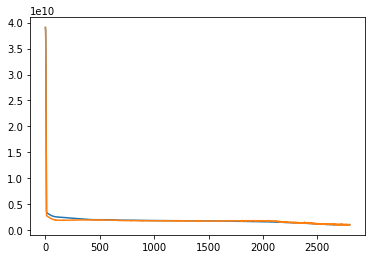

In [292]:
#creating a graph of models loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [293]:
nn_pred = nn_model.predict(x_test)
print('mse: ',mean_squared_error(nn_pred,y_test))
print('r2: ',r2_score(y_test,nn_pred))

mse:  1034674233.1388948
r2:  0.8198677309097758


## creating prediciton

In [36]:
#incase of error
df_test = pd.read_csv('./test.csv')

In [37]:
df_test.shape

(1459, 80)

In [38]:
df_test[col].isna().sum()

OverallQual      0
GrLivArea        0
TotalBsmtSF      1
FullBath         0
EnclosedPorch    0
YearBuilt        0
dtype: int64

In [39]:
#filling the one null with the mean
df_test.TotalBsmtSF.fillna(np.mean(df.TotalBsmtSF),inplace=True)

In [40]:
#creating prediction
prediction = rf.predict(df_test[col])
prediction.shape

(1459,)

In [86]:
#creating lr model prediction
lr_prediction = lr_model.predict(df_test[col])
lr_prediction.shape

(1459,)

In [251]:
#creating nn model prediction
nn_prediction = nn_model.predict(df_test[col])
nn_prediction.shape

(1459, 1)

### creating submission

In [64]:
#creating todays date
from datetime import datetime
date = datetime.today().strftime('%Y-%m-%d')

In [68]:
def create_submission(df_test,prediction,submission_name):
    #creating a new column saleprice with values of prediciton
    df_test['SalePrice'] = prediction
    #creating new dataframe submission which is just the id and prediction
    submission = df_test.drop(columns=df_test.columns[1:len(df_test.columns)-1])
    #changing the index to the column ID
    submission.index = df_test.Id
    #dropping ID now that its the index
    submission.drop(columns=['Id'],inplace=True)

    #creating the submission name
    sub_name = '{} submission {}'.format(submission_name,date)
    return(submission,sub_name)

In [88]:
#saving the csv and name to variables
submission,name = create_submission(df_test,prediction,'Random Forest Regression')
#creating submission
submission.to_csv(name)

In [87]:
#creating submission of lr_prediction
submission,name = create_submission(df_test,lr_prediction,'Linear Regression')
submission.to_csv(name)

In [294]:
#creating submission of nueral net
submission,name = create_submission(df_test,nn_prediction,'Neural Network')
submission.to_csv(name)